In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0_part-0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0_part-0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Boolean type variables
## Apply to pt and check the distribution

## highPurity

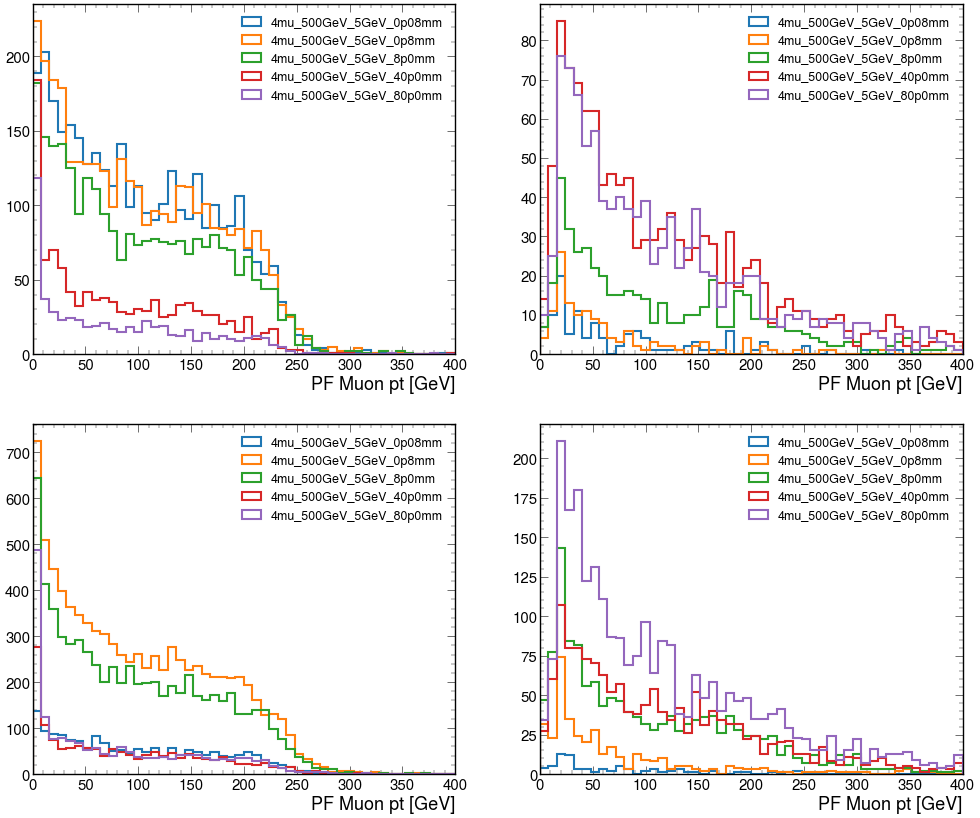

In [36]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].highPurity == False)
    mask2 = (events_2mu2e[i_2mu].highPurity == False)
    
    ax[0][0].hist(ak.flatten(evt1[events_4mu[i_4mu].highPurity]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[mask1]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2[events_2mu2e[i_2mu].highPurity]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1][1].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)


ax[0][0].set_xlim(0,400)
ax[0][1].set_xlim(0,400)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)

ax[0][0].set_xlabel('PF Muon pt [GeV]')
ax[0][1].set_xlabel('PF Muon pt [GeV]')
ax[1][0].set_xlabel('PF Muon pt [GeV]')
ax[1][1].set_xlabel('PF Muon pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
#plt.savefig("../Plots/PF_MUON/Boolean/highPurity1.png", bbox_inches="tight")

## highPtId

4mu highPtId structure: [[2, 2, 1, 1], [2, 2, 2, 0, 2], [2, 2, 2, ... 2, 0], [2, 1, 2, 2, 0], [2, 1, 2, 2]]
2mu2e highPtId structure: [[2, 2], [2, 2], [2, 2, 2], [1, 2], [1, ... [2, 1], [1, 2, 0, 0], [2, 2], [2, 2]]
4mu highPtId structure: [[2, 2, 0, 1], [2, 2, 2, 2], [1, 1, 0, 2, ... 2, 1, 1], [2, 2, 2, 0], [2, 2, 2, 2]]
2mu2e highPtId structure: [[1, 2], [2, 0], [2, 2], [2, 2], [2, 2], ... [2, 2], [2, 0], [2, 0], [2, 2], [2, 1]]
4mu highPtId structure: [[2, 0, 1, 0, 0], [0, 0, 0], [2, 2, 0, 2, ... 0, 0, 0], [2, 0, 0, 2], [2, 0, 0, 0]]
2mu2e highPtId structure: [[0, 0], [0, 0], [0, 0], [0, 0], [2, 2, 0, ... 2, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
4mu highPtId structure: [[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 2], ... [0, 0, 0], [2, 0, 0, 0], [0, 0, 0, 0]]
2mu2e highPtId structure: [[0, 0], [2, 0], [0], [0], [0, 0, 0], [0, ... 0], [0, 0], [0, 0], [0, 0], [0], [0]]
4mu highPtId structure: [[0, 0, 0], [], [0, 0, 0], [0], [0, 2, 0, ... 0], [0, 0, 0, 0], [0], [0, 0, 0, 0, 0]]
2mu2e highPtId str

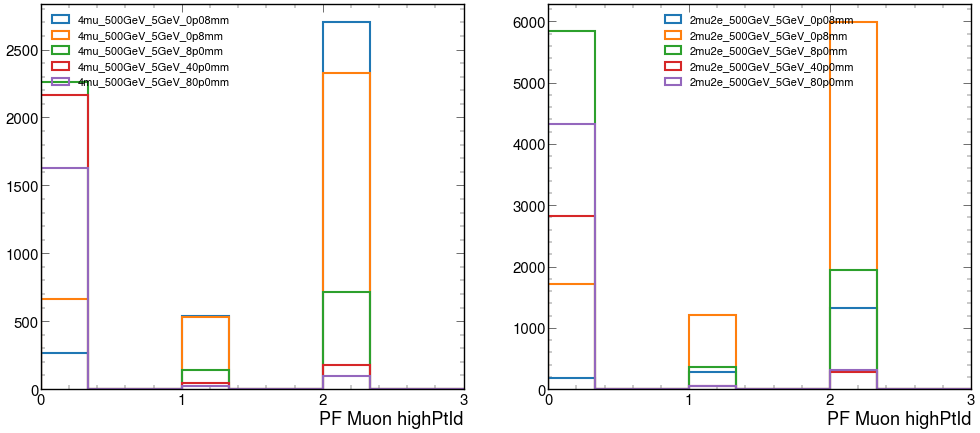

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("highPtId", events_4mu[i_4mu].highPtId, events_2mu2e[i_2mu].highPtId)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].highPtId), range=(0,3), alpha=1, bins=9, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].highPtId), range=(0,3), alpha=1, bins=9, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,3)
ax[1].set_xlim(0,3)
ax[0].set_xlabel('PF Muon highPtId')
ax[1].set_xlabel('PF Muon highPtId')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper center')
ax[0].set_xticks([0,1,2,3])
ax[1].set_xticks([0,1,2,3])
plt.savefig("../Plots/PF_MUON/Cutbased_ID/highPtId.png", bbox_inches="tight")

## miniIsoId

4mu miniIsoId structure: [[4, 4, 4, 4], [4, 4, 4, 1, 1], [4, 4, 4, ... 1, 2], [4, 4, 4, 4, 4], [4, 4, 4, 4]]
2mu2e miniIsoId structure: [[4, 4], [4, 4], [4, 0, 2], [4, 4], [4, ... [4, 4], [4, 4, 4, 4], [4, 4], [0, 3]]
4mu miniIsoId structure: [[1, 4, 4, 0], [4, 4, 4, 4], [4, 4, 4, 4, ... 4, 4, 4], [4, 4, 4, 3], [4, 4, 4, 4]]
2mu2e miniIsoId structure: [[4, 4], [4, 4], [4, 4], [4, 4], [4, 0], ... [4, 4], [4, 3], [4, 4], [4, 4], [4, 4]]
4mu miniIsoId structure: [[4, 4, 4, 2, 0], [4, 4, 4], [4, 4, 4, 0, ... 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4]]
2mu2e miniIsoId structure: [[4, 4], [4, 4], [4, 4], [4, 3], [4, 2, 0, ... 4, 4], [4, 4], [4, 2], [4, 4], [4, 0]]
4mu miniIsoId structure: [[4, 4, 2, 4], [4, 4, 4, 0], [4, 4, 0], ... [4, 2, 4], [4, 4, 4, 4], [4, 4, 2, 4]]
2mu2e miniIsoId structure: [[4, 4], [4, 3], [4], [4], [4, 4, 4], [4, ... 4], [4, 1], [4, 3], [4, 4], [4], [4]]
4mu miniIsoId structure: [[4, 0, 2], [], [4, 4, 4], [4], [4, 4, 4, ... 4], [4, 4, 4, 3], [4], [4, 3, 1, 4, 0]]
2mu2e min

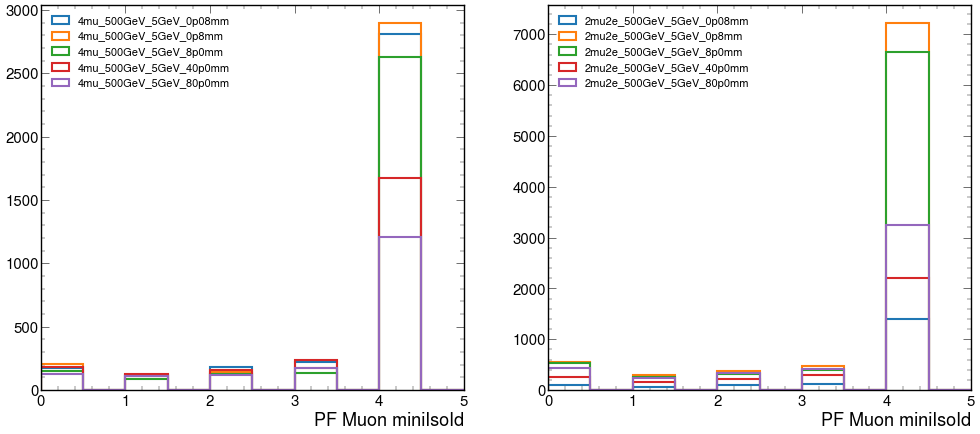

In [23]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("miniIsoId", events_4mu[i_4mu].miniIsoId, events_2mu2e[i_2mu].miniIsoId)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].miniIsoId), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].miniIsoId), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[0].set_xlabel('PF Muon miniIsoId')
ax[1].set_xlabel('PF Muon miniIsoId')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Cutbased_ID/miniIsoId.png", bbox_inches="tight")

## multiIsoId

4mu multiIsoId structure: [[2, 2, 0, 0], [2, 2, 0, 0, 0], [2, 2, 0, ... 0, 0], [2, 2, 0, 0, 2], [0, 0, 0, 0]]
2mu2e multiIsoId structure: [[2, 0], [2, 0], [2, 0, 0], [2, 0], [0, ... [2, 0], [2, 0, 0, 2], [2, 0], [0, 0]]
4mu multiIsoId structure: [[0, 0, 0, 0], [2, 2, 0, 0], [2, 2, 0, 0, ... 0, 0, 0], [2, 0, 0, 0], [2, 0, 0, 0]]
2mu2e multiIsoId structure: [[0, 0], [2, 0], [2, 0], [2, 0], [2, 0], ... [2, 0], [2, 0], [2, 0], [0, 0], [0, 0]]
4mu multiIsoId structure: [[2, 2, 0, 0, 0], [2, 2, 0], [2, 0, 0, 0, ... 0, 0, 0], [2, 0, 0, 0], [2, 2, 0, 0]]
2mu2e multiIsoId structure: [[0, 0], [0, 0], [2, 0], [2, 2], [2, 0, 0, ... 2, 0], [2, 0], [2, 0], [2, 0], [2, 0]]
4mu multiIsoId structure: [[2, 2, 0, 0], [2, 2, 2, 0], [0, 0, 0], ... [2, 0, 0], [2, 2, 0, 0], [2, 2, 0, 0]]
2mu2e multiIsoId structure: [[2, 0], [2, 0], [2], [2], [2, 2, 0], [2, ... 0], [2, 0], [2, 0], [2, 0], [2], [2]]
4mu multiIsoId structure: [[2, 0, 0], [], [2, 2, 2], [2], [2, 2, 0, ... 2], [2, 2, 0, 2], [2], [2, 2, 0, 0, 0]]


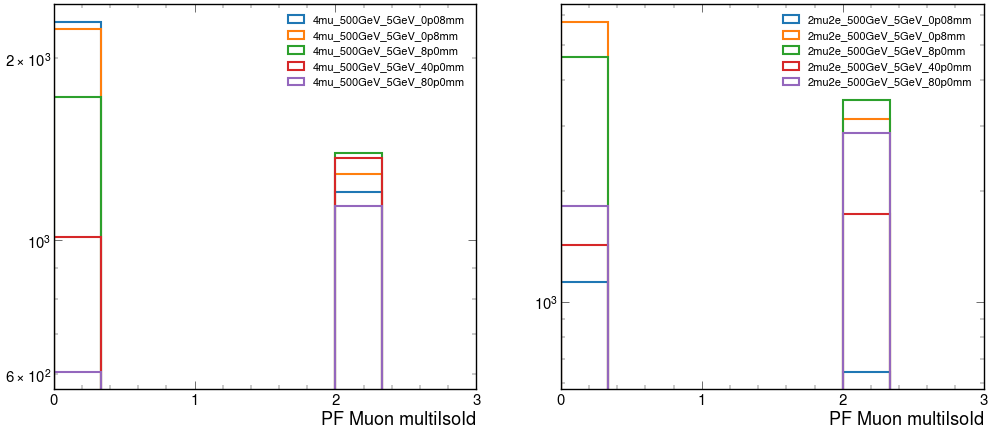

In [38]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("multiIsoId", events_4mu[i_4mu].multiIsoId, events_2mu2e[i_2mu].multiIsoId)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].multiIsoId), range=(0,3), alpha=1, bins=9, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].multiIsoId), range=(0,3), alpha=1, bins=9, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,3)
ax[1].set_xlim(0,3)
ax[0].set_xlabel('PF Muon multiIsoId')
ax[1].set_xlabel('PF Muon multiIsoId')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([0,1,2,3])
ax[1].set_xticks([0,1,2,3])
plt.savefig("../Plots/PF_MUON/Cutbased_ID/multiIsoId.png", bbox_inches="tight")

## mvaId

4mu mvaId structure: [[5, 4, 2, 0], [5, 5, 0, 0, 0], [5, 5, 0, ... 0, 0], [5, 0, 0, 0, 0], [0, 4, 0, 1]]
2mu2e mvaId structure: [[0, 0], [5, 0], [5, 0, 0], [1, 0], [0, ... [5, 0], [4, 0, 0, 0], [4, 0], [0, 0]]
4mu mvaId structure: [[0, 0, 0, 0], [4, 0, 0, 0], [0, 0, 0, 0, ... 4, 4, 1], [0, 0, 0, 0], [0, 1, 4, 0]]
2mu2e mvaId structure: [[0, 0], [0, 0], [0, 0], [0, 0], [5, 0], ... [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
4mu mvaId structure: [[0, 0, 0, 0, 0], [0, 0, 0], [0, 0, 0, 0, ... 0, 0, 0], [5, 0, 0, 0], [0, 0, 0, 0]]
2mu2e mvaId structure: [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0, 0, ... 4, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
4mu mvaId structure: [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0], ... [0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e mvaId structure: [[0, 0], [0, 0], [0], [0], [1, 0, 0], [0, ... 0], [0, 0], [0, 0], [0, 0], [0], [0]]
4mu mvaId structure: [[0, 0, 0], [], [0, 0, 0], [0], [0, 0, 0, ... 0], [0, 0, 0, 0], [0], [0, 0, 0, 0, 0]]
2mu2e mvaId structure: [[0, 0, 0], [0], [0], 

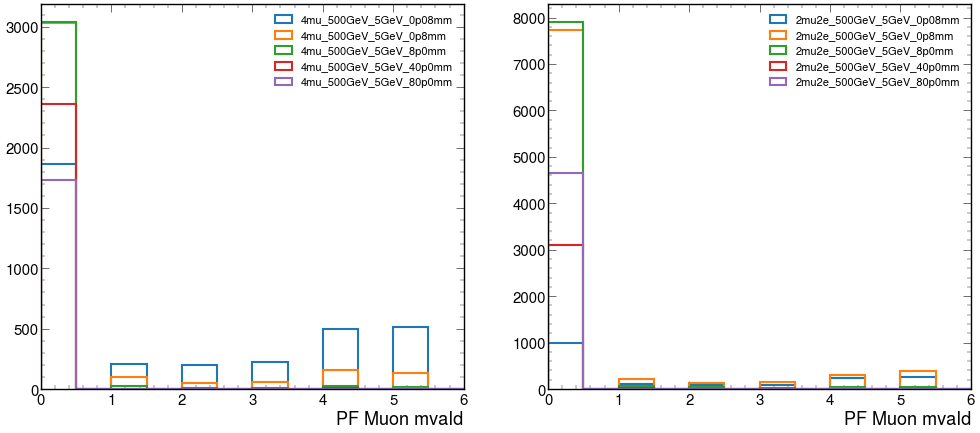

In [63]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mvaId", events_4mu[i_4mu].mvaId, events_2mu2e[i_2mu].mvaId)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mvaId), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mvaId), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,6)
ax[1].set_xlim(0,6)
ax[0].set_xlabel('PF Muon mvaId')
ax[1].set_xlabel('PF Muon mvaId')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Cutbased_ID/mvaId.png", bbox_inches="tight")

## mvaLowPtId

4mu mvaLowPtId structure: [[2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, ... 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2]]
2mu2e mvaLowPtId structure: [[2, 2], [2, 2], [2, 2, 2], [2, 2], [2, ... [2, 2], [2, 2, 2, 2], [2, 2], [2, 2]]
4mu mvaLowPtId structure: [[2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2, ... 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2]]
2mu2e mvaLowPtId structure: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], ... [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
4mu mvaLowPtId structure: [[2, 2, 2, 2, 2], [2, 2, 2], [2, 2, 2, 2, ... 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2]]
2mu2e mvaLowPtId structure: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2, 2, ... 2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
4mu mvaLowPtId structure: [[2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2], ... [2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2]]
2mu2e mvaLowPtId structure: [[2, 2], [2, 2], [2], [2], [2, 2, 2], [2, ... 2], [2, 2], [2, 2], [2, 2], [2], [2]]
4mu mvaLowPtId structure: [[2, 2, 2], [], [2, 2, 2], [2], [2, 2, 2, ... 2], [2, 2, 2, 2], [2], [2, 2, 2, 2, 2]]


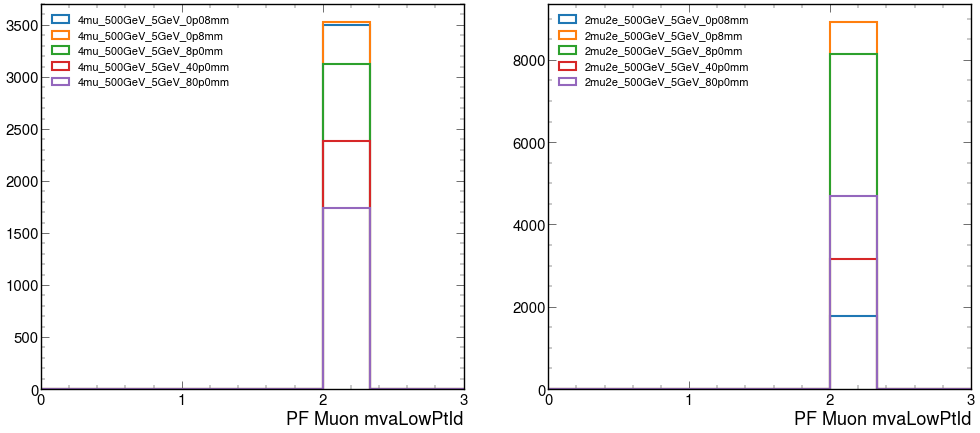

In [39]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mvaLowPtId", events_4mu[i_4mu].mvaLowPtId, events_2mu2e[i_2mu].mvaLowPtId)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mvaLowPtId), range=(0,3), alpha=1, bins=9, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mvaLowPtId), range=(0,3), alpha=1, bins=9, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,3)
ax[1].set_xlim(0,3)
ax[0].set_xlabel('PF Muon mvaLowPtId')
ax[1].set_xlabel('PF Muon mvaLowPtId')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_xticks([0,1,2,3])
ax[1].set_xticks([0,1,2,3])
plt.savefig("../Plots/PF_MUON/Cutbased_ID/mvaLowPtId.png", bbox_inches="tight")

## pfIsoId

4mu pfIsoId structure: [[6, 6, 6, 6], [6, 6, 4, 3, 5], [6, 6, 5, ... 3, 5], [6, 6, 6, 4, 1], [6, 6, 6, 4]]
2mu2e pfIsoId structure: [[6, 5], [6, 5], [6, 0, 6], [6, 6], [6, ... [6, 2], [6, 6, 6, 6], [6, 6], [0, 5]]
4mu pfIsoId structure: [[1, 6, 6, 0], [6, 6, 6, 6], [6, 6, 6, 6, ... 6, 6, 6], [6, 6, 6, 5], [6, 6, 6, 6]]
2mu2e pfIsoId structure: [[6, 6], [6, 1], [6, 5], [6, 6], [6, 1], ... [6, 4], [6, 6], [6, 6], [6, 6], [6, 6]]
4mu pfIsoId structure: [[6, 3, 4, 0, 0], [6, 6, 5], [6, 6, 6, 0, ... 6, 6, 6], [6, 6, 6, 6], [6, 6, 6, 6]]
2mu2e pfIsoId structure: [[6, 6], [6, 6], [6, 1], [6, 5], [5, 1, 0, ... 6, 6], [6, 6], [6, 4], [6, 6], [6, 0]]
4mu pfIsoId structure: [[6, 6, 5, 6], [5, 5, 5, 0], [6, 6, 0], ... [6, 3, 5], [6, 6, 6, 6], [6, 6, 6, 4]]
2mu2e pfIsoId structure: [[6, 6], [6, 6], [6], [6], [6, 6, 6], [6, ... 6], [6, 4], [6, 5], [6, 6], [6], [5]]
4mu pfIsoId structure: [[6, 0, 0], [], [6, 6, 6], [6], [6, 6, 6, ... 5], [6, 6, 6, 5], [6], [6, 6, 3, 6, 0]]
2mu2e pfIsoId structure: [[

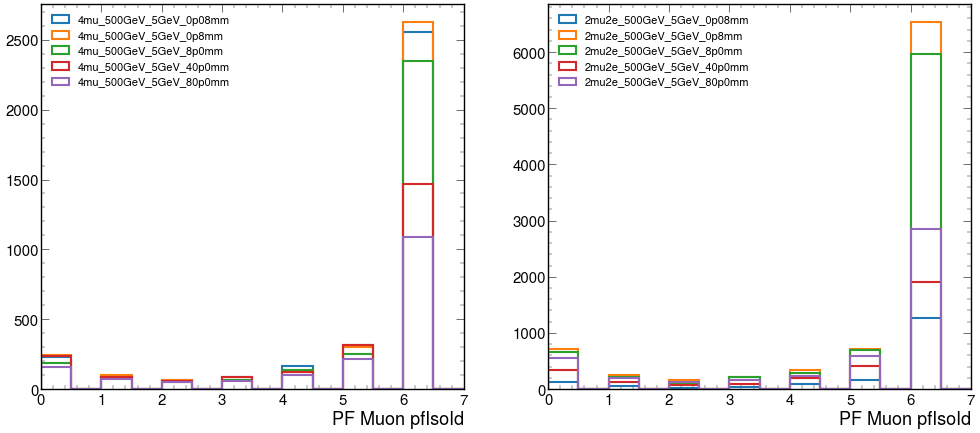

In [33]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pfIsoId", events_4mu[i_4mu].pfIsoId, events_2mu2e[i_2mu].pfIsoId)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pfIsoId), range=(0,7), alpha=1, bins=14, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pfIsoId), range=(0,7), alpha=1, bins=14, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,7)
ax[1].set_xlim(0,7)
ax[0].set_xlabel('PF Muon pfIsoId')
ax[1].set_xlabel('PF Muon pfIsoId')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Cutbased_ID/pfIsoId.png", bbox_inches="tight")

## puppiIsoId

4mu puppiIsoId structure: [[3, 3, 3, 2], [3, 3, 3, 2, 0], [3, 3, 3, ... 2, 0], [3, 3, 3, 2, 0], [3, 3, 3, 3]]
2mu2e puppiIsoId structure: [[3, 3], [3, 3], [3, 1, 0], [3, 3], [3, ... [3, 0], [3, 3, 3, 3], [3, 3], [1, 3]]
4mu puppiIsoId structure: [[2, 3, 3, 0], [3, 3, 3, 2], [3, 3, 3, 3, ... 3, 3, 3], [2, 3, 3, 2], [3, 3, 3, 3]]
2mu2e puppiIsoId structure: [[3, 3], [3, 2], [3, 3], [3, 2], [3, 0], ... [3, 2], [3, 2], [3, 3], [3, 3], [3, 3]]
4mu puppiIsoId structure: [[3, 3, 3, 0, 0], [3, 3, 3], [3, 3, 3, 0, ... 3, 3, 3], [3, 3, 3, 3], [3, 3, 3, 3]]
2mu2e puppiIsoId structure: [[3, 3], [3, 3], [3, 0], [3, 3], [3, 1, 0, ... 3, 3], [3, 3], [3, 3], [3, 1], [3, 0]]
4mu puppiIsoId structure: [[3, 3, 3, 3], [3, 3, 3, 0], [3, 3, 0], ... [3, 3, 2], [3, 3, 3, 3], [3, 3, 3, 2]]
2mu2e puppiIsoId structure: [[3, 3], [3, 3], [3], [3], [3, 3, 3], [3, ... 3], [3, 2], [3, 3], [3, 3], [3], [3]]
4mu puppiIsoId structure: [[3, 3, 0], [], [3, 3, 3], [3], [3, 3, 3, ... 2], [3, 3, 3, 3], [3], [3, 3, 0, 3, 3]]


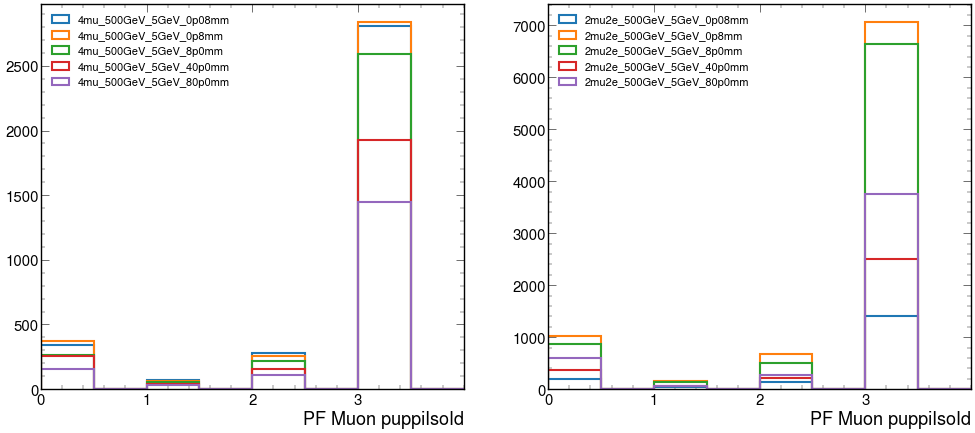

In [40]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("puppiIsoId", events_4mu[i_4mu].puppiIsoId, events_2mu2e[i_2mu].puppiIsoId)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].puppiIsoId), range=(0,4), alpha=1, bins=8, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].puppiIsoId), range=(0,4), alpha=1, bins=8, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,4)
ax[1].set_xlim(0,4)
ax[0].set_xlabel('PF Muon puppiIsoId')
ax[1].set_xlabel('PF Muon puppiIsoId')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_xticks([0,1,2,3])
ax[1].set_xticks([0,1,2,3])
plt.savefig("../Plots/PF_MUON/Cutbased_ID/puppiIsoId.png", bbox_inches="tight")

## tkIsoId

4mu tkIsoId structure: [[0, 0, 0, 0], [2, 0, 0, 2, 0], [0, 1, 0, ... 0, 0], [2, 0, 0, 0, 2], [0, 0, 0, 0]]
2mu2e tkIsoId structure: [[0, 0], [2, 0], [2, 0, 0], [0, 0], [0, ... [2, 0], [0, 0, 2, 2], [0, 0], [0, 0]]
4mu tkIsoId structure: [[0, 2, 2, 0], [1, 0, 0, 0], [0, 2, 2, 0, ... 0, 0, 0], [2, 0, 0, 2], [0, 0, 0, 0]]
2mu2e tkIsoId structure: [[0, 0], [2, 2], [2, 0], [0, 0], [2, 0], ... [0, 0], [2, 0], [2, 0], [0, 0], [2, 2]]
4mu tkIsoId structure: [[2, 2, 2, 2, 0], [2, 2, 2], [2, 0, 2, 0, ... 2, 2, 2], [2, 2, 2, 0], [2, 2, 2, 2]]
2mu2e tkIsoId structure: [[0, 0], [2, 2], [2, 2], [2, 2], [0, 0, 0, ... 2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
4mu tkIsoId structure: [[2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 0], ... [2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2]]
2mu2e tkIsoId structure: [[2, 2], [2, 2], [2], [2], [2, 2, 2], [2, ... 2], [2, 2], [2, 2], [2, 2], [2], [2]]
4mu tkIsoId structure: [[2, 2, 2], [], [2, 2, 2], [2], [2, 2, 2, ... 2], [2, 2, 2, 2], [2], [2, 2, 2, 2, 2]]
2mu2e tkIsoId structure: [[

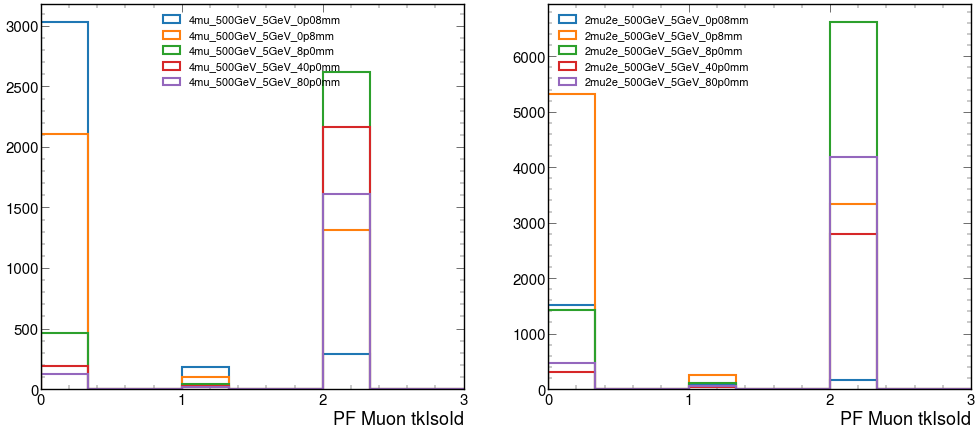

In [44]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("tkIsoId", events_4mu[i_4mu].tkIsoId, events_2mu2e[i_2mu].tkIsoId)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].tkIsoId), range=(0,3), alpha=1, bins=9, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].tkIsoId), range=(0,3), alpha=1, bins=9, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,3)
ax[1].set_xlim(0,3)
ax[0].set_xlabel('PF Muon tkIsoId')
ax[1].set_xlabel('PF Muon tkIsoId')
ax[0].legend(fontsize=16, loc='upper center')
ax[1].legend(fontsize=16)
ax[0].set_xticks([0,1,2,3])
ax[1].set_xticks([0,1,2,3])
plt.savefig("../Plots/PF_MUON/Cutbased_ID/tkIsoId.png", bbox_inches="tight")

## idx

4mu idx structure: [[0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, ... 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3]]
2mu2e idx structure: [[0, 1], [0, 1], [0, 1, 2], [0, 1], [0, ... [0, 1], [0, 1, 2, 3], [0, 1], [0, 1]]
4mu idx structure: [[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3, ... 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]
2mu2e idx structure: [[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], ... [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]
4mu idx structure: [[0, 1, 2, 3, 4], [0, 1, 2], [0, 1, 2, 3, ... 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]
2mu2e idx structure: [[0, 1], [0, 1], [0, 1], [0, 1], [0, 1, 2, ... 0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]
4mu idx structure: [[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2], ... [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3]]
2mu2e idx structure: [[0, 1], [0, 1], [0], [0], [0, 1, 2], [0, ... 1], [0, 1], [0, 1], [0, 1], [0], [0]]
4mu idx structure: [[0, 1, 2], [], [0, 1, 2], [0], [0, 1, 2, ... 0], [0, 1, 2, 3], [0], [0, 1, 2, 3, 4]]
2mu2e idx structure: [[0, 1, 2], [0], [0], [0], [0], [0], ... 0

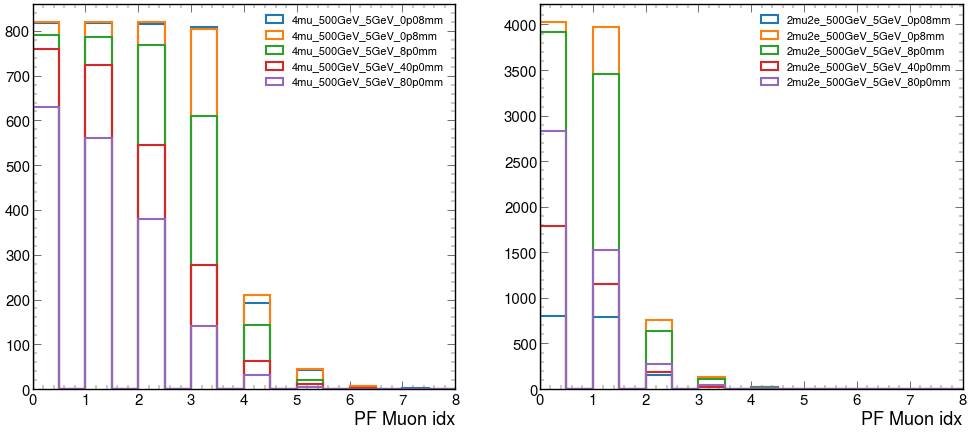

In [46]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("idx", events_4mu[i_4mu].idx, events_2mu2e[i_2mu].idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].idx), range=(0,8), alpha=1, bins=16, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].idx), range=(0,8), alpha=1, bins=16, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,8)
ax[1].set_xlim(0,8)
ax[0].set_xlabel('PF Muon idx')
ax[1].set_xlabel('PF Muon idx')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Cutbased_ID/idx.png", bbox_inches="tight")

## genPartIdx

4mu genPartIdx structure: [[6, 8, 7, 9], [9, 8, 7, -1, 10], [12, 7, ... 8], [9, 7, 6, 8, -1], [8, 12, 11, 10]]
2mu2e genPartIdx structure: [[7, 6], [6, 7], [6, 20, 7], [7, 6], ... [11, 9], [7, 8, -1, -1], [6, 7], [10, 8]]
4mu genPartIdx structure: [[8, 12, 11, 10], [9, 7, 6, 8], [10, 18, ... 7, 9], [8, 11, 12, 10], [10, 11, 12, 8]]
2mu2e genPartIdx structure: [[7, 6], [10, 8], [10, 12], [10, 9], [6, 7, ... 7], [6, 7], [9, 8], [8, 7], [13, 11]]
4mu genPartIdx structure: [[12, 9, 13, -1, -1], [-1, 8, 7], [12, 8, ... 9, 17], [7, 13, 15, 6], [6, 8, 9, 7]]
2mu2e genPartIdx structure: [[6, 7], [10, 8], [8, 10], [6, 7], [12, ... 11], [7, 6], [-1, 10], [8, 10], [18, 16]]
4mu genPartIdx structure: [[-1, 9, 11, 8], [-1, 6, -1, -1], [16, 18, ... 7, 11], [8, 9, 10, 7], [-1, 9, -1, 8]]
2mu2e genPartIdx structure: [[11, 9], [15, 13], [6], [7], [7, -1, 6], ... [7, 8], [6, 7], [6, 7], [12], [8]]
4mu genPartIdx structure: [[6, 12, -1], [], [-1, 9, -1], [6], ... [9, 10, 8, -1], [-1], [12, 9, 11, 13, -1]

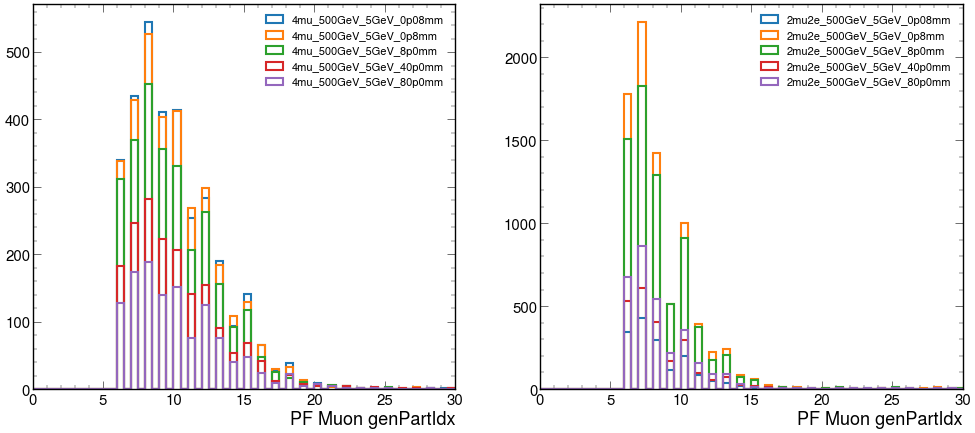

In [48]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("genPartIdx", events_4mu[i_4mu].genPartIdx, events_2mu2e[i_2mu].genPartIdx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].genPartIdx), range=(0,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].genPartIdx), range=(0,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,30)
ax[1].set_xlim(0,30)
ax[0].set_xlabel('PF Muon genPartIdx')
ax[1].set_xlabel('PF Muon genPartIdx')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Cutbased_ID/genPartIdx.png", bbox_inches="tight")

## genPartFlav

4mu genPartFlav structure: [[1, 1, 1, 1], [1, 1, 1, 0, 1], [1, 1, 1, ... 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1]]
2mu2e genPartFlav structure: [[1, 1], [1, 1], [1, 4, 1], [1, 1], [1, ... [1, 1], [1, 1, 0, 0], [1, 1], [1, 1]]
4mu genPartFlav structure: [[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, ... 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]
2mu2e genPartFlav structure: [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], ... [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]
4mu genPartFlav structure: [[1, 1, 1, 0, 0], [0, 1, 1], [1, 1, 1, 1, ... 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]
2mu2e genPartFlav structure: [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1, 0, ... 1, 1], [1, 1], [0, 1], [1, 1], [1, 1]]
4mu genPartFlav structure: [[0, 1, 1, 1], [0, 1, 0, 0], [1, 1, 0], ... [1, 1, 1], [1, 1, 1, 1], [0, 1, 0, 1]]
2mu2e genPartFlav structure: [[1, 1], [1, 1], [1], [1], [1, 0, 1], [0, ... 1], [1, 1], [1, 1], [1, 1], [1], [1]]
4mu genPartFlav structure: [[1, 1, 0], [], [0, 1, 0], [1], [1, 1, 1, ... 1], [1, 1, 1, 0], [0], [1, 1, 1

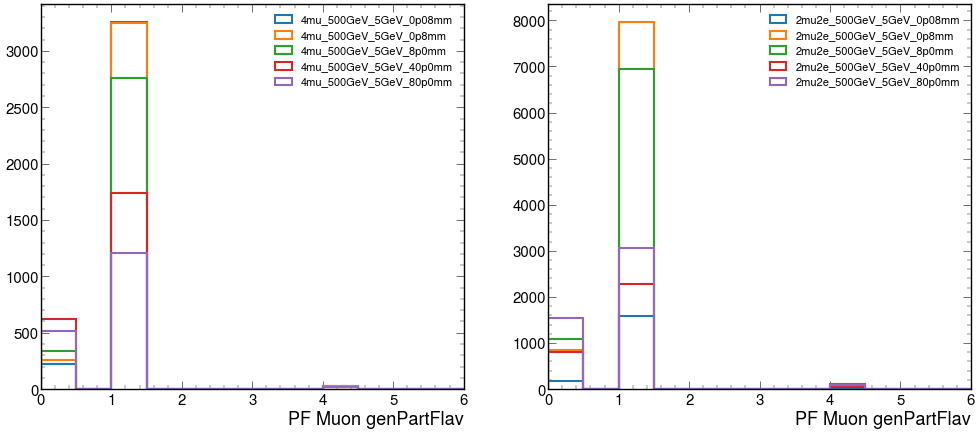

In [51]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("genPartFlav", events_4mu[i_4mu].genPartFlav, events_2mu2e[i_2mu].genPartFlav)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].genPartFlav), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].genPartFlav), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,6)
ax[1].set_xlim(0,6)
ax[0].set_xlabel('PF Muon genPartFlav')
ax[1].set_xlabel('PF Muon genPartFlav')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Cutbased_ID/genPartFlav.png", bbox_inches="tight")

## genPartIdxG

4mu genPartIdxG structure: [[6, 8, 7, 9], [22, 21, 20, -1, ... 20565, 20567, -1], [20596, 20600, 20599, 20598]]
2mu2e genPartIdxG structure: [[7, 6], [27, 28], [54, 68, 55], ... 21323, -1, -1], [21343, 21344], [21365, 21363]]
4mu genPartIdxG structure: [[8, 12, 11, 10], [29, 27, 26, ... 20669, 20667], [20686, 20687, 20688, 20684]]
2mu2e genPartIdxG structure: [[7, 6], [33, 31], [66, 68], ... 105394, 105393], [105420, 105419], [105460, 105458]]
4mu genPartIdxG structure: [[12, 9, 13, -1, -1], [-1, 41, ... 20022, 20013], [20032, 20034, 20035, 20033]]
2mu2e genPartIdxG structure: [[6, 7], [23, 21], [48, 50], ... [-1, 105473], [105501, 105503], [105541, 105539]]
4mu genPartIdxG structure: [[-1, 9, 11, 8], [-1, 43, -1, -1, ... 19308, 19309, 19306], [-1, 19329, -1, 19328]]
2mu2e genPartIdxG structure: [[11, 9], [57, 55], [76], [100], ... 50732, 50733], [50759, 50760], [50777], [50804]]
4mu genPartIdxG structure: [[6, 12, -1], [], [-1, 51, -1], ... -1], [-1], [16259, 16256, 16258, 16260, -1]]

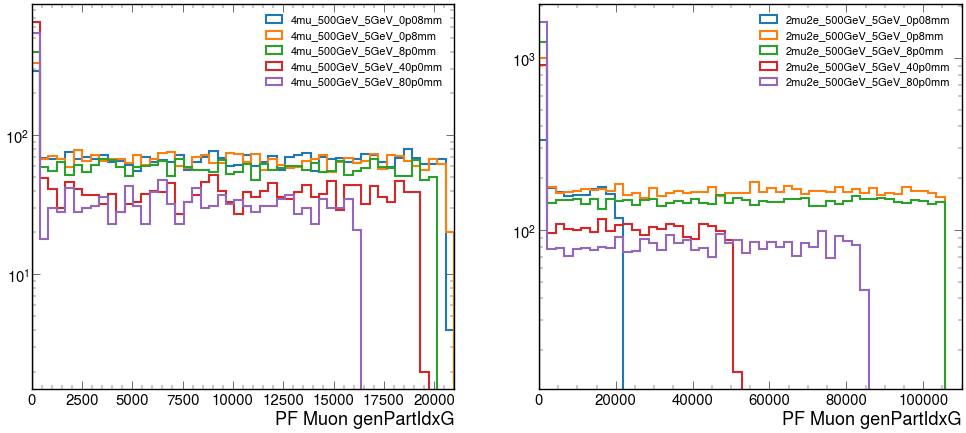

In [66]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("genPartIdxG", events_4mu[i_4mu].genPartIdxG, events_2mu2e[i_2mu].genPartIdxG)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].genPartIdxG), range=(-1,21000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].genPartIdxG), range=(-1,110000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,21000)
ax[1].set_xlim(0,110000)
ax[0].set_xlabel('PF Muon genPartIdxG')
ax[1].set_xlabel('PF Muon genPartIdxG')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Cutbased_ID/genPartIdxG.png", bbox_inches="tight")